In [1]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --user
#!pip install pandas-profiling

In [3]:
#!pip install --upgrade jupyterlab-git

#jupyter lab build

In [4]:
import pandas as pd 
import numpy as np
import math
import json
import seaborn as sns
import pickle
from scipy import interpolate
import csv, re, random
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
import joypy

Requirements:
    -Download file from https://www.foreignlaborcert.doleta.gov/performancedata.cfm#dis the latest version PERM "FY2020 Q3.xlsx"
        -Data dictionary available under "PERM Record Layout.pdf" link
    -Form groups of three and explore the data
        -Do quick exploration of data
            -Create histograms of variables
            -Pay attention to which ones you like
            -Investigate data exploration tools, some ideas: 
                -pandas profiling https://github.com/pandas-profiling/pandas-profiling
                -dabl https://amueller.github.io/dabl/dev/index.html (from one of the core contributors of Scikit-Learn)
                -think about joining other datasets to augment this file
        -Come up with ideas about what you want to explore. Potential ideas:
            -Which cases are more likely to succeed given a profession, city, lawyer, filing date?
            -Use tf/idf or word vectors or whatever to summarize professions (NLP)
            -What are the top newspapers for each city vs profession (blue collar vs white collar)
            -Don't try to investigate everything! Pick a direction, let other teams follow their own paths
        -Clean/normalize the data. Potential ideas:
            -missing values?
            -pay in terms of hourly vs annual?
            -why are some descriptions all caps?
        -Clearly communicate results. 
            -Use lessons from "Leadership" class (if you've taken it)
            -But use jupyter, not power point (unless you want to use the RISE plugin for Jupyter or something similar)
            -Create nice visualizations (optional)
    -You must use GitHub to manage this project and coordinate among your teammates 
        -This should be very helpful: https://github.com/jupyterlab/jupyterlab-git
        -This is an alternative, probably not as user friendly https://github.com/jupyter/nbdime
    -Since this is a team project, you must come up with a good methodology for managing changes, here are some suggestions:
        -http://drivendata.github.io/cookiecutter-data-science/
        -https://github.com/quantumblacklabs/kedro
        -Just give these links a quick read. You don't have to install any packages. Just pay attention to their recommendations.
            -Pay attention to their directory structure and how they organize their notebooks, data assets, etc.
            -Pay attention to how they name their files
            -Pay attention to what other lessons you can learn from them, but trying to follow every suggestion will likely be a waste of time for such a short project

Ethics:
    -This data contains LOTS of private information. Use it with care.
        -Would you still be ok if your analysis became public, perhaps viral?
    -Expect your anaysis to be challenged. Challenge the analysis of other teams

Deliverable:
    -I expect one main python notebook containing your analysis
    -You can upload a zipped folder which contains supporting notebooks which contain
        -Your basic exploration
        -Experiments you may have done
        -A README file telling me where to find the main notebook
        -Everything, except the main notebook is optional


General notes:
    -You may use any package and learn from anyone (classmates, resources on the internet), but may not directly copy
        -Feel free to reach out to your colleagues to see what they are doing. Set up zoom calls for walkthroughs of each other's work
        -Investigate visualization packages, some ideas to get you started: matplotlib, seaborn, altair, bokeh, holoviews, bqplot
    -You do not have to build prediction or clustering models, but you may build several if you like
    -You can "hire" me to provide extra lectures on version control, visualization or any other topic. The cost is that you must convince at least 8 people to attend this extra lecture.
    
Here are some interesting notebooks I found online:

Notebook which is nicely done, although it is in French:
https://github.com/jhroy/theses/blob/master/theses.ipynb

World differences in infectious tuberculosis prevalence:
https://github.com/jadianes/data-journalism/tree/master/articles/tuberculosis-world-situation

Exploring Datasets with Python:
https://github.com/MartinSeeler/python-data-exploration/blob/master/Exploring%20Datasets.ipynb

In [5]:
perm_df = pd.read_excel('PERM_FY2020_Q3.xlsx') 

In [6]:
perm_df

CASE_NUMBER        CASE_STATUS RECEIVED_DATE       DECISION_DATE  \
0      A-09245-62715             Denied    2009-09-03 2020-04-30 14:50:29   
1      A-10119-96737  Certified-Expired    2010-03-29 2019-10-18 11:34:37   
2      A-10225-13679             Denied    2010-08-10 2020-04-30 07:55:08   
3      A-11033-51540          Certified    2011-02-03 2020-05-28 08:38:56   
4      A-11074-62984             Denied    2011-03-10 2020-06-17 07:50:52   
...              ...                ...           ...                 ...   
71937  A-20181-70773          Withdrawn    2020-06-29 2020-06-29 14:07:10   
71938  A-20181-71005          Withdrawn    2020-06-29 2020-06-30 12:12:53   
71939  A-20181-71066          Withdrawn    2020-06-29 2020-06-30 15:06:07   
71940  A-20181-71075          Withdrawn    2020-06-30 2020-06-30 22:16:32   
71941  A-20182-71613          Withdrawn    2020-06-30 2020-06-30 22:15:51   

      REFILE ORIG_FILE_DATE PREVIOUS_SWA_CASE_NUMBER_STATE SCHD_A_SHEEPHERDER  \
0          N            NaT                            NaN                  N   
1          Y     2000-09-15                       MARYLAND                  N   
2          N            NaT                            NaN                  N   
3          N            NaT                            NaN                  N   
4          N            NaT                            NaN                  N   
...      ...            ...                            ...                ...   
71937      N            NaT                            NaN                  N   
71938      N            NaT                            NaN                  N   
71939      N            NaT                            NaN                  N   
71940      N            NaT                            NaN                  N   
71941      N            NaT                            NaN                  N   

                              EMPLOYER_NAME        EMPLOYER_ADDRESS_1  ...  \
0                    SATURN ENTERPRISES INC      2340 N WASHTENAW AVE  ...   
1                                FIL PARONG         13528 JAMIESON PL  ...   
2                  GLENNS PLUMBING SERVICES         854 CUSTER STREET  ...   
3                   SKILLNET SOLUTIONS INC.  1901 SOUTH BASCOM AVENUE  ...   
4               R    L  CONSTRUCTION,  INC.    904  NEPPERHAN  AVENUE  ...   
...                                     ...                       ...  ...   
71937  Hyder Investments Inc. DBA McDonalds       7088 E Fish Lake Rd  ...   
71938               ONLY IT CONSULTING, LLC         2200 W HIGGINS RD  ...   
71939               EVEREST COMPUTERS, INC.      875 OLD ROSWELL ROAD  ...   
71940                  OUNZE CORPORATE, LLC          8934 HARDING AVE  ...   
71941                 QUADRANT RESOURCE LLC         4034 148TH AVE NE  ...   

      FOREIGN_WORKER_ALT_OCC_EXP FOREIGN_WORKER_EXP_WITH_EMPL  \
0                            NaN                            N   
1                            NaN                            N   
2                              N                            N   
3                              Y                            N   
4                            NaN                            N   
...                          ...                          ...   
71937                        NaN                          NaN   
71938                          N                            N   
71939                        NaN                            N   
71940                        NaN                          NaN   
71941                          Y                            N   

      FOREIGN_WORKER_EMPL_PAY_FOR_ED FOREIGN_WORKER_CURR_EMPLOYED  \
0                                  N                            N   
1                                  N                            N   
2                                  N                            N   
3                                  N                            Y   
4                                  N            

In [7]:
perm_df.describe()

EMPLOYER_NUM_EMPLOYEES  EMPLOYER_YEAR_COMMENCED_BUSINESS  \
count            7.193300e+04                      71915.000000   
mean             4.528936e+04                       1986.438518   
std              1.564067e+05                         35.445622   
min              0.000000e+00                       1193.000000   
25%              1.070000e+02                       1981.000000   
50%              2.000000e+03                       1998.000000   
75%              2.372600e+04                       2006.000000   
max              2.072251e+07                       2020.000000   

       AGENT_ATTORNEY_PHONE_EXT       PW_WAGE  WAGE_OFFER_FROM  WAGE_OFFER_TO  \
count               2065.000000  7.193400e+04     7.193800e+04   2.567400e+04   
mean                1764.058596  8.892187e+04     1.015221e+05   1.460500e+05   
std                 8513.084263  6.296018e+04     9.200195e+04   8.790573e+04   
min                    0.000000  7.160000e+00     7.250000e+00   7.250000e+00   
25%                  101.000000  6.390390e+04     7.417300e+04   1.200000e+05   
50%                  121.000000  9.243500e+04     1.018370e+05   1.507500e+05   
75%                  242.000000  1.137760e+05     1.280000e+05   1.780000e+05   
max                94841.000000  1.338060e+07     1.338060e+07   1.104690e+07   

       REQUIRED_TRAINING_MONTHS  REQUIRED_EXPERIENCE_MONTHS  \
count                920.000000                40722.000000   
mean                  30.383696                   31.737832   
std                   21.999544                   22.538033   
min                    0.000000                    0.000000   
25%                    6.000000                   12.000000   
50%                   36.000000                   24.000000   
75%                   36.000000                   48.000000   
max                  120.000000                  264.000000   

       ACCEPT_ALT_COMBO_EDUCATION_YRS  ACCEPT_ALT_OCCUPATION_MONTHS  \
count                    20832.000000                  48868.000000   
mean                         4.592982                     34.453078   
std                          4.165656                     23.223743   
min                          0.000000                      0.000000   
25%                          3.000000                     12.000000   
50%                          5.000000                     24.000000   
75%                          5.000000                     60.000000   
max                         96.000000                    240.000000   

       FOREIGN_WORKER_YRS_ED_COMP  
count                63328.000000  
mean                  2006.816906  
std                     84.862567  
min                      0.000000  
25%                   2007.000000  
50%                   2012.000000  
75%                   2015.000000  
max                   2107.000000

In [8]:
# Read data
employment = pd.read_csv('project_data_cleaned.csv')

# Print
employment.head()

Unnamed: 0        case_status received_date decision_date  \
0           0             Denied      9/3/2009     4/30/2020   
1           1  Certified-Expired     3/29/2010    10/18/2019   
2           2             Denied     8/10/2010     4/30/2020   
3           3          Certified      2/3/2011     5/28/2020   
4           4             Denied     3/10/2011     6/17/2020   

      employer_city employer_state_province  employer_num_employees  \
0           CHICAGO                ILLINOIS                     2.0   
1        GERMANTOWN                MARYLAND                     0.0   
2  N. VALLEY STREAM                NEW YORK                     3.0   
3          CAMPBELL              CALIFORNIA                    29.0   
4           YONKERS                NEW YORK                    43.0   

   emp_contact_city emp_contact_state_province emp_contact_postal_code  ...  \
0           chicago                   ILLINOIS                   60647  ...   
1        GERMANTOWN                   MARYLAND                   20874  ...   
2  N. VALLEY STREAM                   NEW YORK                   11580  ...   
3         Sunnyvale                 CALIFORNIA                   94086  ...   
4           YONKERS                   NEW YORK                   10703  ...   

  pw_soc_code foreign_language_required   first_newspaper_name  \
0  43-6011.00                         Y        Chicago Tribune   
1  49-9042.00                         N    WASHINGTON EXAMINER   
2  47-2152.02                         N                NY Post   
3  15-1031.00                         N  San Jose Mercury News   
4  47-1011.01                         N        NEW  YORK  POST   

  second_newspaper_ad_name country_of_citizenship  \
0          Chicago Tribune                 POLAND   
1      WASHINGTON EXAMINER            PHILIPPINES   
2                  NY Post            EL SALVADOR   
3    San Jose Mercury News                  INDIA   
4          NEW  YORK  POST                IRELAND   

  foreign_worker_birth_country class_of_admission foreign_worker_education  \
0                       POLAND                B-2              High School   
1                  PHILIPPINES                B-2              High School   
2                  EL SALVADOR                EWI                     None   
3                        INDIA               H-1B                    Other   
4                      IRELAND                NaN              High School   

                   foreign_worker_info_major  \
0                                    GENERAL   
1                                HIGH SCHOOL   
2                                        NaN   
3  ELECTRONICS ENGINEERING  COMPUTER SCIENCE   
4                                    GENERAL   

                        foreign_worker_inst_of_ed  
0                              LICEUM EKONOMICZNE  
1                SAN JACINTO NATIONAL HIGH SCHOOL  
2                                             NaN  
3  SHRI BAHAGUBHAI MAFATLAL POLYTECHNIC INSTITUTE  
4                          FALCARRAGH HIGH SCHOOL  

[5 rows x 31 columns]

In [9]:
employment.columns

Index(['Unnamed: 0', 'case_status', 'received_date', 'decision_date',
       'employer_city', 'employer_state_province', 'employer_num_employees',
       'emp_contact_city', 'emp_contact_state_province',
       'emp_contact_postal_code', 'agent_attorney_name',
       'agent_attorney_firm_name', 'pw_skill_level', 'pw_wage',
       'pw_unit_of_pay', 'worksite_city', 'worksite_state',
       'worksite_postal_code', 'required_experience',
       'required_experience_months', 'wage_offer_unit_of_pay', 'pw_soc_code',
       'foreign_language_required', 'first_newspaper_name',
       'second_newspaper_ad_name', 'country_of_citizenship',
       'foreign_worker_birth_country', 'class_of_admission',
       'foreign_worker_education', 'foreign_worker_info_major',
       'foreign_worker_inst_of_ed'],
      dtype='object')

In [10]:
pd.set_option('display.max_columns', None)
perm_df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'PREVIOUS_SWA_CASE_NUMBER_STATE',
       'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FOREIGN_WORKER_ALT_OCC_EXP', 'FOREIGN_WORKER_EXP_WITH_EMPL',
       'FOREIGN_WORKER_EMPL_PAY_FOR_ED', 'FOREIGN_WORKER_CURR_EMPLOYED',
       'EMPLOYER_COMPLETED_APPLICATION', 'PREPARER_NAME', 'PREPARER_TITLE',
       'PREPARER_EMAIL', 'EMP_INFO_DECL_NAME', 'EMP_INFO_DECL_TITLE'],
      dtype='object', length=154)

#Select the required columns for Analysis. 
#Focus is on Case status relationship with the SOC titile and wage level 

In [11]:
anlayze_data = perm_df[['CASE_STATUS', 'RECEIVED_DATE','DECISION_DATE','REFILE','EMPLOYER_NAME','EMPLOYER_STATE_PROVINCE','EMPLOYER_NUM_EMPLOYEES','AGENT_ATTORNEY_FIRM_NAME','PW_SOC_CODE','PW_SOC_TITLE','PW_SKILL_LEVEL','PW_WAGE','PW_UNIT_OF_PAY','WAGE_OFFER_FROM','WAGE_OFFER_TO','WAGE_OFFER_UNIT_OF_PAY','WORKSITE_STATE','JOB_TITLE','MINIMUM_EDUCATION','REQUIRED_EXPERIENCE','REQUIRED_EXPERIENCE_MONTHS','FOREIGN_LANGUAGE_REQUIRED','COUNTRY_OF_CITIZENSHIP','CLASS_OF_ADMISSION','FOREIGN_WORKER_EDUCATION','FOREIGN_WORKER_EDUCATION_OTHER']]

In [12]:
anlayze_data.head()

CASE_STATUS RECEIVED_DATE       DECISION_DATE REFILE  \
0             Denied    2009-09-03 2020-04-30 14:50:29      N   
1  Certified-Expired    2010-03-29 2019-10-18 11:34:37      Y   
2             Denied    2010-08-10 2020-04-30 07:55:08      N   
3          Certified    2011-02-03 2020-05-28 08:38:56      N   
4             Denied    2011-03-10 2020-06-17 07:50:52      N   

                 EMPLOYER_NAME EMPLOYER_STATE_PROVINCE  \
0       SATURN ENTERPRISES INC                ILLINOIS   
1                   FIL PARONG                MARYLAND   
2     GLENNS PLUMBING SERVICES                NEW YORK   
3      SKILLNET SOLUTIONS INC.              CALIFORNIA   
4  R    L  CONSTRUCTION,  INC.                NEW YORK   

   EMPLOYER_NUM_EMPLOYEES  AGENT_ATTORNEY_FIRM_NAME PW_SOC_CODE  \
0                     2.0      Kurczaba Law Offices  43-6011.00   
1                     0.0        WINSTON TSAI, ESQ.  49-9042.00   
2                     3.0  DANIEL J. SULLIVAN, ESQ.  47-2152.02   
3                    29.0     Baker Law Corporation  15-1031.00   
4                    43.0             NON  ATTORNEY  47-1011.01   

                                        PW_SOC_TITLE PW_SKILL_LEVEL  \
0                           administrative assistant        Level I   
1                MAINTENANCE  REPAIR WORKER, GENERAL      Level III   
2                                            PLUMBER       Level IV   
3                            Comp. SWE, Applications       Level IV   
4  FIRST LINE SUPERVISORS  CONSTRUCTION TRADES WO...        Level I   

     PW_WAGE PW_UNIT_OF_PAY  WAGE_OFFER_FROM  WAGE_OFFER_TO  \
0      14.49           Hour            14.49            NaN   
1      19.36           Hour            19.36            NaN   
2   78645.00           Year            38.00           40.0   
3  131518.00           Year        131518.00            NaN   
4   53643.00           Year         53643.00            NaN   

  WAGE_OFFER_UNIT_OF_PAY WORKSITE_STATE                 JOB_TITLE  \
0                   Hour       ILLINOIS  administrative assistant   
1                   Hour       MARYLAND      MAINTENANCE REPAIRER   
2                   Hour       NEW YORK                   PLUMBER   
3                   Year     CALIFORNIA        Programmer Analyst   
4                   Year       NEW YORK          PROJECT  MANAGER   

  MINIMUM_EDUCATION REQUIRED_EXPERIENCE  REQUIRED_EXPERIENCE_MONTHS  \
0       High School                   Y                        24.0   
1       High School                   N                        24.0   
2              None                   Y                        24.0   
3        Bachelor's                   Y                        60.0   
4              None                   Y                        24.0   

  FOREIGN_LANGUAGE_REQUIRED COUNTRY_OF_CITIZENSHIP CLASS_OF_ADMISSION  \
0                         Y                 POLAND                B-2   
1                         N            PHILIPPINES                B-2   
2                         N            EL SALVADOR                EWI   
3                         N                  INDIA               H-1B   
4                         N                IRELAND                NaN   

  FOREIGN_WORKER_EDUCATION           FOREIGN_WORKER_EDUCATION_OTHER  
0              High School                                      NaN  
1              High School                                      NaN  
2                     None                                      NaN  
3                    Other  EQUIV. OF BS BASED ON COMBO OF DIPLOMAS  
4              High School                                      NaN

In [13]:
anlayze_data.shape

(71942, 26)

#Used Pandas Profile to create a report and review the data

In [14]:
from pandas_profiling import ProfileReport
profile_data = ProfileReport(anlayze_data, title="Pandas PERM Profiling Report",explorative=True)

C:\Users\rsure\anaconda3\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
#profile_data.to_widgets()

C:\Users\rsure\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\rsure\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\rsure\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\rsure\anaconda3\lib\si

C:\Users\rsure\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\visualisation\plot.py:160: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
C:\Users\rsure\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\visualisation\plot.py:160: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)
C:\Users\rsure\AppData\Roaming\Python\Python37\site-packages\pandas_profiling\visualisation\plot.py:160: MatplotlibDeprecationWarning: You are modifying the state of a gl

In [16]:
#profile_data.to_notebook_iframe()

#Identify number of rows for each column with null values

In [17]:
anlayze_data.isnull().sum(axis = 0)

CASE_STATUS                           0
RECEIVED_DATE                         5
DECISION_DATE                         0
REFILE                                0
EMPLOYER_NAME                         0
EMPLOYER_STATE_PROVINCE               1
EMPLOYER_NUM_EMPLOYEES                9
AGENT_ATTORNEY_FIRM_NAME           5956
PW_SOC_CODE                          46
PW_SOC_TITLE                          9
PW_SKILL_LEVEL                     4303
PW_WAGE                               8
PW_UNIT_OF_PAY                       10
WAGE_OFFER_FROM                       4
WAGE_OFFER_TO                     46268
WAGE_OFFER_UNIT_OF_PAY                3
WORKSITE_STATE                        4
JOB_TITLE                            13
MINIMUM_EDUCATION                     6
REQUIRED_EXPERIENCE                   2
REQUIRED_EXPERIENCE_MONTHS        31220
FOREIGN_LANGUAGE_REQUIRED             0
COUNTRY_OF_CITIZENSHIP                6
CLASS_OF_ADMISSION                 5854
FOREIGN_WORKER_EDUCATION              5


#Handle NA's
Drop NA rows which cannot be derived from other 
For columns that can be derived or default from other columns , fill na using the derived values

In [27]:
#dropna rows
anlayze_data.dropna(subset=['PW_SOC_TITLE', 'PW_SKILL_LEVEL','EMPLOYER_NUM_EMPLOYEES','PW_UNIT_OF_PAY'],inplace=True)

anlayze_data.loc[anlayze_data['WAGE_OFFER_FROM'].isnull(), 'WAGE_OFFER_FROM'] = anlayze_data['PW_WAGE']
anlayze_data['WAGE_OFFER_TO']=anlayze_data['WAGE_OFFER_TO'].fillna(anlayze_data['WAGE_OFFER_FROM'])
anlayze_data.loc[anlayze_data['CASE_STATUS']== 'Withdrawn', 'RECEIVED_DATE'] = anlayze_data['DECISION_DATE']
anlayze_data.loc[anlayze_data['WAGE_OFFER_UNIT_OF_PAY'].isnull(), 'WAGE_OFFER_UNIT_OF_PAY'] = anlayze_data['PW_UNIT_OF_PAY']
anlayze_data['CLASS_OF_ADMISSION']=anlayze_data['CLASS_OF_ADMISSION'].fillna('UNKNOWN')


#Verify the NA count after data cleanup

In [31]:
anlayze_data.isnull().sum(axis = 0)

CASE_STATUS                           0
RECEIVED_DATE                         0
DECISION_DATE                         0
REFILE                                0
EMPLOYER_NAME                         0
EMPLOYER_STATE_PROVINCE               1
EMPLOYER_NUM_EMPLOYEES                0
AGENT_ATTORNEY_FIRM_NAME           5670
PW_SOC_CODE                          11
PW_SOC_TITLE                          0
PW_SKILL_LEVEL                        0
PW_WAGE                               0
PW_UNIT_OF_PAY                        0
WAGE_OFFER_FROM                       0
WAGE_OFFER_TO                         0
WAGE_OFFER_UNIT_OF_PAY                0
WORKSITE_STATE                        3
JOB_TITLE                             5
MINIMUM_EDUCATION                     2
REQUIRED_EXPERIENCE                   1
REQUIRED_EXPERIENCE_MONTHS        28978
FOREIGN_LANGUAGE_REQUIRED             0
COUNTRY_OF_CITIZENSHIP                4
CLASS_OF_ADMISSION                    0
FOREIGN_WORKER_EDUCATION              2


In [32]:
anlayze_data.groupby(['WAGE_OFFER_UNIT_OF_PAY'])['WAGE_OFFER_FROM'].agg([('Min' , 'min'), ('Max', 'max')])
       

Min         Max
WAGE_OFFER_UNIT_OF_PAY                     
Bi-Weekly                1000.0      4075.2
Hour                        8.0     90000.0
Month                    2000.0    107500.0
Week                      400.0    161476.0
Year                    16973.0  13380600.0

In [33]:
anlayze_data.groupby(['PW_UNIT_OF_PAY'])['PW_WAGE'].agg([('Min' , 'min'), ('Max', 'max')])

Min          Max
PW_UNIT_OF_PAY                       
Bi-Weekly        2500.00      4075.20
Hour                8.31       100.00
Month            2000.00      6914.17
Week              400.00       900.00
Year            16931.00  13380600.00

#There are some bad value combos for 'WAGE_OFFER_FROM' and WAGE_OFFER_UNIT_OF_PAY. There are week pay of 161476 which seems to be bad input data. For now , we keep the bad data as we are not currently focusing on using annual_offered_salaray. We can cleanup if incase the data is used for answering another business case

Standardize the salary with different units to common . Convert hourly,weekly,monthly to Annual

In [34]:
# Convert PW_wage and WAGE_OFFER_UNIT_OF_PAY rates to salary

anlayze_data.loc[anlayze_data['PW_UNIT_OF_PAY'] == 'Year', 'ANNUAL_PW_SALARY'] = anlayze_data['PW_WAGE'] * 1
# Assume working 40 hr / week and there are 52 weeks in a year
anlayze_data.loc[anlayze_data['PW_UNIT_OF_PAY'] == 'Hour', 'ANNUAL_PW_SALARY'] = anlayze_data['PW_WAGE'] * 40 * 52
anlayze_data.loc[anlayze_data['PW_UNIT_OF_PAY'] == 'Week', 'ANNUAL_PW_SALARY'] = anlayze_data['PW_WAGE'] * 52
anlayze_data.loc[anlayze_data['PW_UNIT_OF_PAY'] == 'Month', 'ANNUAL_PW_SALARY'] = anlayze_data['PW_WAGE'] * 12
anlayze_data.loc[anlayze_data['PW_UNIT_OF_PAY'] == 'Bi-Weekly', 'ANNUAL_PW_SALARY'] = anlayze_data['PW_WAGE'] * 26

anlayze_data.loc[anlayze_data['WAGE_OFFER_UNIT_OF_PAY'] == 'Year', 'ANNUAL_OFFERED_SALARY'] = anlayze_data['WAGE_OFFER_FROM'] * 1
# Assume working 40 hr / week and there are 52 weeks in a year
anlayze_data.loc[anlayze_data['WAGE_OFFER_UNIT_OF_PAY'] == 'Hour', 'ANNUAL_OFFERED_SALARY'] = anlayze_data['WAGE_OFFER_FROM'] * 40 * 52
anlayze_data.loc[anlayze_data['WAGE_OFFER_UNIT_OF_PAY'] == 'Week', 'ANNUAL_OFFERED_SALARY'] = anlayze_data['WAGE_OFFER_FROM'] * 52
anlayze_data.loc[anlayze_data['WAGE_OFFER_UNIT_OF_PAY'] == 'Month', 'ANNUAL_OFFERED_SALARY'] = anlayze_data['WAGE_OFFER_FROM'] * 12
anlayze_data.loc[anlayze_data['WAGE_OFFER_UNIT_OF_PAY'] == 'Bi-Weekly', 'ANNUAL_OFFERED_SALARY'] = anlayze_data['WAGE_OFFER_FROM'] * 26

## Calculate the Case duration

In [35]:
# Convert DECISION_DATE to date only
anlayze_data['DECISION_DATE'] =  pd.to_datetime(anlayze_data['DECISION_DATE']).apply(lambda x: x.date())
# Convert DECISION_DATE back to datetime format
anlayze_data['DECISION_DATE'] =  pd.to_datetime(anlayze_data['DECISION_DATE'])
# Create a new column of CASE_DURATION calculating the duration of case acceptance

anlayze_data['CASE_DURATION'] = anlayze_data['DECISION_DATE'] - anlayze_data['RECEIVED_DATE']
anlayze_data['CASE_DURATION'] = anlayze_data['CASE_DURATION'] / np.timedelta64(1, 'D')

In [36]:
anlayze_data.dtypes

CASE_STATUS                               object
RECEIVED_DATE                     datetime64[ns]
DECISION_DATE                     datetime64[ns]
REFILE                                    object
EMPLOYER_NAME                             object
EMPLOYER_STATE_PROVINCE                   object
EMPLOYER_NUM_EMPLOYEES                   float64
AGENT_ATTORNEY_FIRM_NAME                  object
PW_SOC_CODE                               object
PW_SOC_TITLE                              object
PW_SKILL_LEVEL                            object
PW_WAGE                                  float64
PW_UNIT_OF_PAY                            object
WAGE_OFFER_FROM                          float64
WAGE_OFFER_TO                            float64
WAGE_OFFER_UNIT_OF_PAY                    object
WORKSITE_STATE                            object
JOB_TITLE                                 object
MINIMUM_EDUCATION                         object
REQUIRED_EXPERIENCE                       object
REQUIRED_EXPERIENCE_

In [37]:
anlayze_data.isnull().sum(axis = 0)

CASE_STATUS                           0
RECEIVED_DATE                         0
DECISION_DATE                         0
REFILE                                0
EMPLOYER_NAME                         0
EMPLOYER_STATE_PROVINCE               1
EMPLOYER_NUM_EMPLOYEES                0
AGENT_ATTORNEY_FIRM_NAME           5670
PW_SOC_CODE                          11
PW_SOC_TITLE                          0
PW_SKILL_LEVEL                        0
PW_WAGE                               0
PW_UNIT_OF_PAY                        0
WAGE_OFFER_FROM                       0
WAGE_OFFER_TO                         0
WAGE_OFFER_UNIT_OF_PAY                0
WORKSITE_STATE                        3
JOB_TITLE                             5
MINIMUM_EDUCATION                     2
REQUIRED_EXPERIENCE                   1
REQUIRED_EXPERIENCE_MONTHS        28978
FOREIGN_LANGUAGE_REQUIRED             0
COUNTRY_OF_CITIZENSHIP                4
CLASS_OF_ADMISSION                    0
FOREIGN_WORKER_EDUCATION              2


In [38]:
# Convert numeric columns to integer
anlayze_data=anlayze_data.reset_index(drop=True)
int_columns=['PW_WAGE','WAGE_OFFER_FROM','WAGE_OFFER_TO','ANNUAL_PW_SALARY','ANNUAL_OFFERED_SALARY','EMPLOYER_NUM_EMPLOYEES','CASE_DURATION']
anlayze_data[int_columns] = anlayze_data[int_columns].astype(int)

#title_columns=('EMPLOYER_STATE_PROVINCE','WORKSITE_STATE','JOB_TITLE''COUNTRY_OF_CITIZENSHIP')
#analyze_data[] = analyze_data['COUNTRY_OF_CITIZENSHIP'].str.title()

In [39]:
filter_cols=['CASE_STATUS','PW_SOC_TITLE','PW_SKILL_LEVEL','CLASS_OF_ADMISSION']
anlayze_data[filter_cols]

CASE_STATUS                                       PW_SOC_TITLE  \
0                 Denied                           administrative assistant   
1      Certified-Expired                MAINTENANCE  REPAIR WORKER, GENERAL   
2                 Denied                                            PLUMBER   
3              Certified                            Comp. SWE, Applications   
4                 Denied  FIRST LINE SUPERVISORS  CONSTRUCTION TRADES WO...   
...                  ...                                                ...   
67626          Withdrawn  Combined Food Preparation and Serving Workers,...   
67627          Withdrawn                                   SYSTEMS ENGINEER   
67628          Withdrawn                           SENIOR SOFTWARE ENGINEER   
67629          Withdrawn                                 Operations Manager   
67630          Withdrawn              Software Developers, Systems Software   

      PW_SKILL_LEVEL CLASS_OF_ADMISSION  
0            Level I                B-2  
1          Level III                B-2  
2           Level IV                EWI  
3           Level IV               H-1B  
4            Level I            UNKNOWN  
...              ...                ...  
67626        Level I                F-1  
67627      Level III               H-1B  
67628       Level IV               H-1B  
67629       Level IV         Not in USA  
67630      Level III               H-1B  

[67631 rows x 4 columns]

In [40]:
print(anlayze_data.PW_SKILL_LEVEL.value_counts())

Level II     22683
Level I      16955
Level IV     15222
Level III    12771
Name: PW_SKILL_LEVEL, dtype: int64


In [41]:
anlayze_data['ANNUAL_OFFERED_SALARY'].min(),anlayze_data['ANNUAL_OFFERED_SALARY'].max()

(16640, 187200000)

In [42]:
anlayze_data[anlayze_data['ANNUAL_OFFERED_SALARY'] == 187200000]

CASE_STATUS RECEIVED_DATE DECISION_DATE REFILE  \
21471  Certified-Expired    2019-08-23    2019-10-30      N   

                        EMPLOYER_NAME EMPLOYER_STATE_PROVINCE  \
21471  TECHDATA SERVICE COMPANY, LLC.            PENNSYLVANIA   

       EMPLOYER_NUM_EMPLOYEES   AGENT_ATTORNEY_FIRM_NAME PW_SOC_CODE  \
21471                     296  Law Office of David Piver     15-2041   

        PW_SOC_TITLE PW_SKILL_LEVEL  PW_WAGE PW_UNIT_OF_PAY  WAGE_OFFER_FROM  \
21471  Statisticians       Level II    55016           Year            90000   

       WAGE_OFFER_TO WAGE_OFFER_UNIT_OF_PAY WORKSITE_STATE  \
21471          90000                   Hour   PENNSYLVANIA   

                           JOB_TITLE MINIMUM_EDUCATION REQUIRED_EXPERIENCE  \
21471  Senior Statistical Programmer          Master's                   N   

       REQUIRED_EXPERIENCE_MONTHS FOREIGN_LANGUAGE_REQUIRED  \
21471                         NaN                         N   

      COUNTRY_OF_CITIZENSHIP CLASS_OF_ADMISSION FOREIGN_WORKER_EDUCATION  \
21471                  INDIA                F-1                 Master's   

      FOREIGN_WORKER_EDUCATION_OTHER  ANNUAL_PW_SALARY  ANNUAL_OFFERED_SALARY  \
21471                            NaN             55016              187200000   

       CASE_DURATION  
21471             68

In [43]:
anlayze_data.groupby(['PW_SKILL_LEVEL'])['ANNUAL_PW_SALARY'].agg([('Min' , 'min'), ('Max', 'max')])

Min       Max
PW_SKILL_LEVEL                 
Level I         16931    208000
Level II        17680    248019
Level III       19926  13380600
Level IV        17202    288267

In [ ]:
anlayze_data.to_csv("Data/Clean/Cleaned_Data_for_Visualization_Suren.csv")

In [45]:
filter_cols=['PW_SKILL_LEVEL','ANNUAL_PW_SALARY']
denied_salary_df=anlayze_data.loc[anlayze_data['CASE_STATUS'] == 'Denied',filter_cols]
denied_salary_df.loc[denied_salary_df['PW_SKILL_LEVEL'] == 'Level I',filter_cols].min()

PW_SKILL_LEVEL      Level I
ANNUAL_PW_SALARY      16931
dtype: object

#Plot of annual salary for the denied case status 

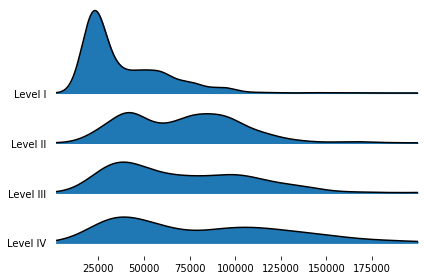

In [46]:
fig, axes = joypy.joyplot(denied_salary_df, by="PW_SKILL_LEVEL",column="ANNUAL_PW_SALARY",x_range=(2000,200000))
plt.show()

#labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
#fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
#                          grid="y", linewidth=1, legend=False, figsize=(6,5),
#                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
#                          colormap=cm.autumn_r)

#Plot of annual salary for the Certified cases 

In [47]:
filter_cols=['PW_SKILL_LEVEL','ANNUAL_PW_SALARY']
case_list = ['Certified','Certified-Expired']
certified_salary_df=anlayze_data.loc[anlayze_data['CASE_STATUS'].isin(case_list),filter_cols]


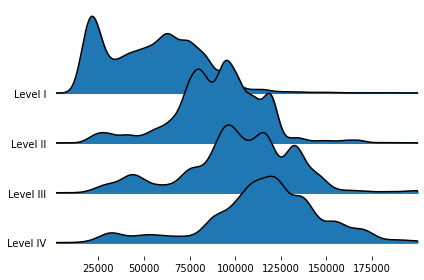

In [48]:
fig, axes = joypy.joyplot(certified_salary_df, by="PW_SKILL_LEVEL",column="ANNUAL_PW_SALARY",x_range=(2000,200000))
plt.show()

#labels=[y if y%10==0 else None for y in list(temp.Year.unique())]
#fig, axes = joypy.joyplot(temp, by="Year", column="Anomaly", labels=labels, range_style='own', 
#                          grid="y", linewidth=1, legend=False, figsize=(6,5),
#                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
#                          colormap=cm.autumn_r)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2280x1520 with 0 Axes>

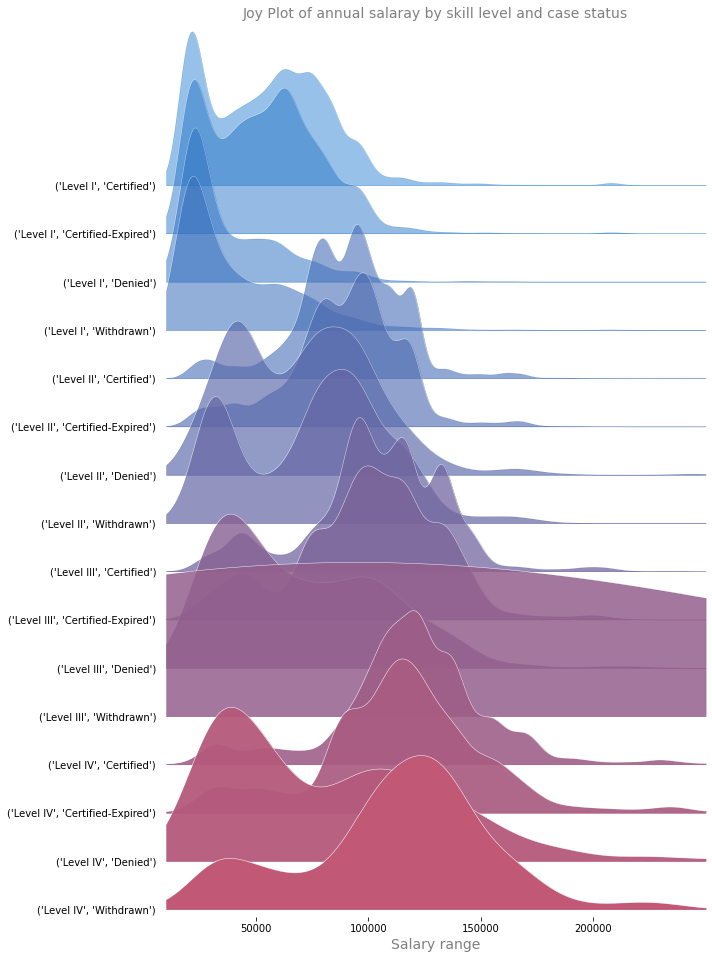

In [49]:
#create a color gradent function to be used in the colormap parameter
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)
#show the table

#plot the figure
plt.figure(dpi=380)
fig, axes = joypy.joyplot(anlayze_data
                          , column=["ANNUAL_PW_SALARY"]
                          , overlap=2.5
                          , by=["PW_SKILL_LEVEL","CASE_STATUS"]
                          , ylim='own'
                          , x_range=(10000,250000)
                          , fill=True
                          , figsize=(10,13)
                          , legend=False
                          , xlabels=True
                          , ylabels=True
                          #, color=['#76a5af', '#134f5c']
                          , colormap=lambda x: color_gradient(x, start=(.08, .45, .8)
                                                             ,stop=(.8, .34, .44))
                          , alpha=0.6
                          , linewidth=.5
                          , linecolor='w'
                          #, background='k' # change to 'k' for black background or 'grey' for grey
                          , fade=True)
plt.title('Joy Plot of annual salaray by skill level and case status'
          , fontsize=14
          , color='grey'
          , alpha=1)
plt.rc("font", size=12)
plt.xlabel('Salary range', fontsize=14, color='grey', alpha=1)
plt.ylabel('Case-Skill', fontsize=8, color='grey', alpha=1)
plt.show

In [50]:
#skill_case_status = pd.crosstab(anlayze_data.PW_SKILL_LEVEL, anlayze_data.CASE_STATUS)
skill_case_status = pd.crosstab(anlayze_data.CASE_STATUS,anlayze_data.PW_SKILL_LEVEL)

In [51]:
skill_case_status

PW_SKILL_LEVEL     Level I  Level II  Level III  Level IV
CASE_STATUS                                              
Certified            11459     15970       9089     10585
Certified-Expired     3581      5221       2876      3548
Denied                 970       615        433       613
Withdrawn              945       877        373       476

In [52]:
anlayze_data.CASE_STATUS.unique()

array(['Denied', 'Certified-Expired', 'Certified', 'Withdrawn'],
      dtype=object)

##Plot Case status vs skill level to identify which skill level was certified or denied highest

Sample code for reference:

import matplotlib.pyplot as plt
categorical_1 = ['A', 'B', 'C', 'D']
colors        = ['green', 'red', 'blue', 'orange']
numerical = [[6, 9, 2, 7],
             [6, 7, 3, 8],
             [9, 11, 13, 15],
             [3, 5, 9, 6]]
number_groups = len(categorical_1) 
bin_width = 1.0/(number_groups+1)
fig, ax = plt.subplots(figsize=(6,6))
for i in range(number_groups):
    ax.bar(x=np.arange(len(categorical_1)) + i*bin_width, 
           height=numerical[i],
           width=bin_width,
           color=colors[i],
           align='center')
ax.set_xticks(np.arange(len(categorical_1)) + number_groups/(2*(number_groups+1)))
---number_groups/(2*(number_groups+1)): offset of xticklabel
ax.set_xticklabels(categorical_1)
ax.legend(categorical_1, facecolor='w')
plt.show()

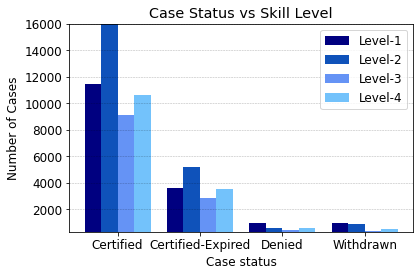

In [53]:
labels = ['Certified', 'Certified-Expired', 'Denied', 'Withdrawn']

x = np.arange(len(anlayze_data.CASE_STATUS.unique()))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, skill_case_status.iloc[:,0], width, color='#000080', label='Level-1')
ax.bar(x + width, skill_case_status.iloc[:,1], width, color='#0F52BA', label='Level-2')
ax.bar(x + (2 * width), skill_case_status.iloc[:,2], width, color='#6593F5', label='Level-3')
ax.bar(x + (3*width), skill_case_status.iloc[:,3], width, color='#73C2FB', label='Level-4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Case status')
ax.set_title('Case Status vs Skill Level')
ax.set_xticks(x + width + width/2)
ax.set_ylim(300,16000)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

#Plot Denied vs Withdrawn Separately

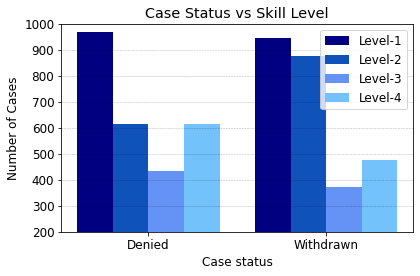

In [54]:
labels = ['Denied', 'Withdrawn']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, skill_case_status.iloc[2:,0], width, color='#000080', label='Level-1')
ax.bar(x + width, skill_case_status.iloc[2:,1], width, color='#0F52BA', label='Level-2')
ax.bar(x + (2 * width), skill_case_status.iloc[2:,2], width, color='#6593F5', label='Level-3')
ax.bar(x + (3*width), skill_case_status.iloc[2:,3], width, color='#73C2FB', label='Level-4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Case status')
ax.set_title('Case Status vs Skill Level')
ax.set_xticks(x + width + width/2)
ax.set_ylim(200,1000)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

#Identify Top 10 Visa type and their overall percentages

In [55]:
status_visa_type = pd.crosstab(anlayze_data.CLASS_OF_ADMISSION,anlayze_data.CASE_STATUS,margins=True)
status_visa_type['Percentage'] = 100 * status_visa_type.iloc[1:-1,4:]['All']  / status_visa_type.iloc[1:-1,4:]['All'].sum()
status_visa_type.drop(['UNKNOWN','Not in USA'], inplace=True)
status_visa_DF = status_visa_type.sort_values('Certified', ascending=False).head(2)

In [56]:
status_visa_type.sort_values('Certified', ascending=False).head(10)

CASE_STATUS         Certified  Certified-Expired  Denied  Withdrawn    All  \
CLASS_OF_ADMISSION                                                           
All                     47103              15226    2631       2671  67631   
H-1B                    31781              10197     827       1295  44100   
L-1                      3359               1179      82        104   4724   
F-1                      3095                917     256        238   4506   
TN                        836                252      39         33   1160   
B-2                       503                177     196         57    933   
E-2                       439                131      92         54    716   
O-1                       274                 81       5         13    373   
H-4                       231                 68       8          8    315   
J-1                       193                 61      19         13    286   

CASE_STATUS         Percentage  
CLASS_OF_ADMISSION              
All                        NaN  
H-1B                 65.247304  
L-1                   6.989303  
F-1                   6.666765  
TN                    1.716256  
B-2                   1.380402  
E-2                   1.059344  
O-1                   0.551865  
H-4                   0.466052  
J-1                   0.423146

In [57]:
visa_type_group_df = anlayze_data.groupby(['CLASS_OF_ADMISSION','CASE_STATUS']).agg({'CASE_STATUS':'count'})
# Change: groupby state_office and divide by sum
visa_type_pct_df = visa_type_group_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
visa_type_group_df.loc['H-1B']
#visa_type_pct_df

CASE_STATUS
CASE_STATUS                   
Certified                31781
Certified-Expired        10197
Denied                     827
Withdrawn                 1295

In [58]:
status_visa_DF.index.to_numpy()

array(['All', 'H-1B'], dtype=object)

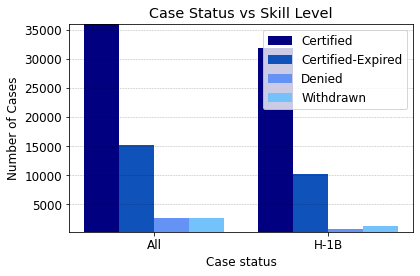

In [59]:
labels = ['Certified', 'Certified-Expired', 'Denied', 'Withdrawn']
labels = status_visa_DF.index.to_numpy()

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x, status_visa_DF.iloc[:,0], width, color='#000080', label='Certified')
ax.bar(x + width, status_visa_DF.iloc[:,1], width, color='#0F52BA', label='Certified-Expired')
ax.bar(x + (2 * width), status_visa_DF.iloc[:,2], width, color='#6593F5', label='Denied')
ax.bar(x + (3*width), status_visa_DF.iloc[:,3], width, color='#73C2FB', label='Withdrawn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Cases')
ax.set_xlabel('Case status')
ax.set_title('Case Status vs Skill Level')
ax.set_xticks(x + width + width/2)
ax.set_ylim(300,36000)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.tight_layout()
plt.show()

# Conclusion from above Analysis:
There are over 65%  of H1B application in the given dataset and less than 3% denial for the given time period.
Also There are more number of Level II applicants than the other and surprisingly  high denial rate for skill level 4 than any other level.

